 # **Researching the Impact of Multiple Factors in Speech Transcription Using Amazon Transcribe Service**

Group : Angel Song, Sirui Hu, Julin Ye, Aoran Wang, Ruize Hou

Github repository: https://github.com/Sirui1303/QTM350FinalProject 

## Introduction

  Audio is a popular source of content expression, ranging from music, podcast, to zoom classes. Audio not only enhances multimedia applications by serving as an extra channel of information but also adds a sense of realism by conveying emotion, time period, and geographical location of the speaker. During the Covid-19 pandemic in which social distancing is required, audio has become an increasingly important channel for people to conduct their businesses and connect with each other. For example, many companies adopted audio calls as a method to replace traditional meetings and schools delivered online lectures to avoid gatherings. Audio transcription, as a complementary service for audio, converts speech in an audio file into written text. It has a wide range of applications, such as extracting information from interviews, analyzing patterns in academic research and even adding subtitles to lecture recording. Thus, the accuracy of audio transcription becomes critical to whether or not the users can correctly and efficiently understand the audio and apply the results to their work field. Traditionally, users had to rely on transcription providers to manually listen and transcribe the audio into text, which was costly, inefficient and in poor accuracy. Thanks to the rapid development of artificial intelligence and machine learning technology, now we can use a lot of online transcription services to help us achieve our goals.

  In this report, we are going to examine three factors,  text type, speech speed, and accent, that could potentially affect the accuracy of audio transcription by measuring the word error rate(WER). We adopt Google TTS to generate 55 different texts by altering the text type, speech speed, and accent, and transcribe them to texts using Amazon Transcribe Service. We then calculate the corresponding word error rate for each text and analyze the results using a wide range of python statistics tools. Our assumption before data analysis is that first, when the speech speed increases, the accuracy will decrease holding other factors fixed, second, the accuracy of US accent will be higher than it of other texts, and we remain uncertain about how different text type affect the accuracy. Based on the results, we found that accent has a more significant impact on the accuracy of transcription compared to speed. The detailed results will be illustrated in the data analysis section.

## Method Overview

  The core method in our project is Amazon Transcribe Services, which uses automatic speech recognition(ASR), a deep learning process, to convert speech to text quickly with high accuracy. The method enjoys four main benefits. First, it creates easily readable transcriptions by adding speaker diarization, punctuation and formatting. Second, it ensures customers privacy by identifying and redacting sensitive personally identifiable information and allowing contact centers to easily review and share the transcripts for the purpose of customer experience insight and agent training based on the PII. Third, it increases accuracy with customized transcriptions by allowing users to add new words to base vocabulary, such as product names, technical terminology, etc. or train the language model. Fourth, it filters specific words by enabling the user to mask or remove unwanted words.


## Research Design

**1. Architecture**

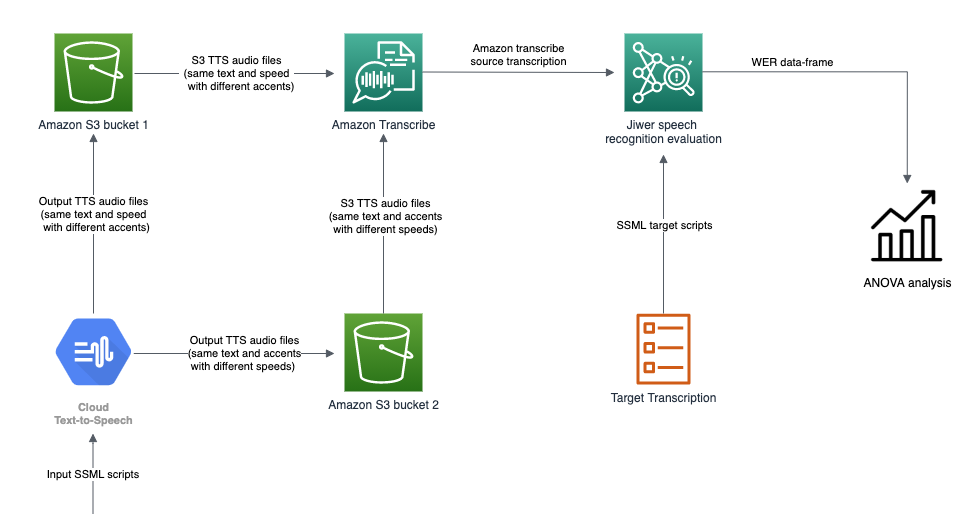


We initially input SSML scripts to a Google text to audio converting service named Google TTS Audio Service, from which we generated two groups of audio files: ones with same speeds and different accents and ones with same accents and different speeds. To proceed, we uploaded them into two separate Amazon S3 buckets, and utilized Amazon Transcribe service to convert them to our source text files. Afterwards, we used the Jiwer speech evaluation recognition package to build the WER (world error rate) dataframe, where we compare the target original input SSML scripts and source text files we generated using Amazon Transcribe service. Finally, we input the WER dataframe to ANOVA analysis to testify whether our results are statistically significant. 

**2. Generate Speech and Upload to S3 Bucket**

We generated raw audio files using an online voice-generator which applies the Google TTS Audio Service. Although Amazon has its own text-to-audio service named Amazon Polly, it has only four different accents available, which does not provide us enough sample data for the research. On the contrary Google TTS provides a variety of  The content includes five different texts as followed, ranging from novels and website contents to news articles:

TEXT1 Emory Qss Major Intro (http://quantitative.emory.edu/undergraduate/majors-minors/index.html):
OVERVIEW OF THE QSS MAJOR
The Quantitative Sciences (QSS) major is the integration of liberal arts and data science. With the QSS major, students learn data science techniques and quantitative theory while they study the natural sciences, social sciences, or humanities.

You will take quantitative classes (such as statistics, game theory, and experimental methods) and classes in an associated discipline based on your area of interest (such as political science, psychology, neuroscience and behavioral biology, history, and more).
Finally, a major as diverse as your interests! If you aren't sure what discipline you want to pursue, you can start with the...

TEXT2 USNews - Emory Introduction (https://www.usnews.com/best-colleges/emory-university-1564):
Emory University, located near downtown Atlanta, is divided into nine schools and colleges, four of which serve undergraduate and graduate students. Emory’s graduate programs include the highly ranked Goizueta Business School, School of Law and School of Medicine. First and second-year students are required to live on campus, but a majority of students remain on campus all four years. The Student Programming Council organizes events and performances throughout the year, including from well-known entertainers and musicians. A popular student organization is Volunteer Emory, which oversees community service activities. The Emory Eagles have nearly 20 NCAA Division III varsity teams and are well-known for their successful swimming and diving team. Regardless of whether they participate in varsity athletics, all students are required to take two courses in physical education. Emory also has a thriving Greek community.

TEXT3 Great Gatsby Final Paragraph (https://www.falseart.com/last-page-of-the-great-gatsby-by-f-scott-fitzgerald/):

Gatsby believed in the green light, the orgastic future that year by year recedes before us. It eluded us then, but that’s no matter—tomorrow we will run faster, stretch out our arms farther. And one fine morning—
So we beat on, boats against the current, borne back ceaselessly into the past.

TEXT4 Amazon Transcribe (https://aws.amazon.com/transcribe/):
Amazon Transcribe uses advanced machine learning technologies to recognize speech in your audio or video and transcribe that speech into text. You can use Amazon Transcribe to convert audio to text and to create applications that incorporate the content of audio files. For example, you can transcribe the audio track from a video recording to create closed captioning for the video.

TEXT5 NYT
(https://www.nytimes.com/2021/04/05/business/raising-taxes-corporations.html?action=click&module=Spotlight&pgtype=Homepage):

The Biden administration and top Democrats in Congress began detailing plans for significant changes to how the United States and other countries tax multinational corporations as they look for ways to raise revenues and finance President Biden’s $2 trillion infrastructure proposal.
On Monday, Treasury Secretary Janet L. Yellen threw her support behind an international effort to create a global minimum tax that would apply to multinational corporations, regardless of where they locate their headquarters. Such a global tax, she said, could help prevent a “race to the bottom” in which countries cut their tax rates in order to entice companies to move headquarters and profits across borders.
Variables:
As the research aims to analyze the effect of accents and speed on the accuracy of text generated by Amazon Transcribe. The raw audios cover six different accents including French, Spanish, Japanese, Korean, UK, and US. The audio files were also generated at five different speeds including 0.5,0.8,1.0,1.2, and 1.5 in the US accent. 


create s3 buckets for the two variables: Accent and Speed of Speech**
  

In [ ]:
!aws s3 mb s3://qtm350final-accent
!aws s3 mb s3://qtm350final-speed
!aws s3 ls
import boto3

make_bucket: qtm350final-accent
make_bucket: qtm350final-speed
2021-03-28 14:06:25 notebook-angel
2021-04-06 08:45:14 qtm350final-accent
2021-04-07 02:07:37 qtm350final-accent-transcribe
2021-04-06 08:45:15 qtm350final-speed


Copy French-accent audio files with "French" in the files' names from local to AWS S3 bucket named qtm350final-accent

In [ ]:
!aws s3 cp ./FinalProjectAccent s3://qtm350final-accent/French --recursive --exclude "*" --include "*French*"

upload: FinalProjectAccent/French_speed=1.0_text3.mp3 to s3://qtm350final-accent/French/French_speed=1.0_text3.mp3
upload: FinalProjectAccent/French_speed=1.0_text4.mp3 to s3://qtm350final-accent/French/French_speed=1.0_text4.mp3
upload: FinalProjectAccent/French_speed=1.0_text1.mp3 to s3://qtm350final-accent/French/French_speed=1.0_text1.mp3
upload: FinalProjectAccent/French_speed=1.0_text5.mp3 to s3://qtm350final-accent/French/French_speed=1.0_text5.mp3
upload: FinalProjectAccent/French_speed=1.0_text2.mp3 to s3://qtm350final-accent/French/French_speed=1.0_text2.mp3


Copy Spanish-accent audio files with "Spanish" in the files' names from local to AWS S3 bucket named qtm350final-accent

In [ ]:
!aws s3 cp ./FinalProjectAccent s3://qtm350final-accent/Spanish --recursive --exclude "*" --include "*Spanish*"

upload: FinalProjectAccent/Spanish_speed=1.0_text3.mp3 to s3://qtm350final-accent/Spanish/Spanish_speed=1.0_text3.mp3
upload: FinalProjectAccent/Spanish_speed=1.0_text4.mp3 to s3://qtm350final-accent/Spanish/Spanish_speed=1.0_text4.mp3
upload: FinalProjectAccent/Spanish_speed=1.0_text2.mp3 to s3://qtm350final-accent/Spanish/Spanish_speed=1.0_text2.mp3
upload: FinalProjectAccent/Spanish_speed=1.0_text1.mp3 to s3://qtm350final-accent/Spanish/Spanish_speed=1.0_text1.mp3
upload: FinalProjectAccent/Spanish_speed=1.0_text5.mp3 to s3://qtm350final-accent/Spanish/Spanish_speed=1.0_text5.mp3


Copy Japanese-accent audio files with "Janpanese" in the files' names from local to AWS S3 bucket named qtm350final-accent

In [ ]:
!aws s3 cp ./FinalProjectAccent s3://qtm350final-accent/Japanese --recursive --exclude "*" --include "*Japanese*"

upload: FinalProjectAccent/Japanese_speed=1.0_text4.mp3 to s3://qtm350final-accent/Japanese/Japanese_speed=1.0_text4.mp3
upload: FinalProjectAccent/Japanese_speed=1.0_text2.mp3 to s3://qtm350final-accent/Japanese/Japanese_speed=1.0_text2.mp3
upload: FinalProjectAccent/Japanese_speed=1.0_text3.mp3 to s3://qtm350final-accent/Japanese/Japanese_speed=1.0_text3.mp3
upload: FinalProjectAccent/Japanese_speed=1.0_text1.mp3 to s3://qtm350final-accent/Japanese/Japanese_speed=1.0_text1.mp3
upload: FinalProjectAccent/Japanese_speed=1.0_text5.mp3 to s3://qtm350final-accent/Japanese/Japanese_speed=1.0_text5.mp3


Copy Korean-accent audio files with "Korean" in the files' names from local to AWS S3 bucket named qtm350final-accent

In [ ]:
!aws s3 cp ./FinalProjectAccent s3://qtm350final-accent/Korean --recursive --exclude "*" --include "*Korean*"

upload: FinalProjectAccent/Korean_speed=1.0_text1.mp3 to s3://qtm350final-accent/Korean/Korean_speed=1.0_text1.mp3
upload: FinalProjectAccent/Korean_speed=1.0_text2.mp3 to s3://qtm350final-accent/Korean/Korean_speed=1.0_text2.mp3
upload: FinalProjectAccent/Korean_speed=1.0_text4.mp3 to s3://qtm350final-accent/Korean/Korean_speed=1.0_text4.mp3
upload: FinalProjectAccent/Korean_speed=1.0_text5.mp3 to s3://qtm350final-accent/Korean/Korean_speed=1.0_text5.mp3
upload: FinalProjectAccent/Korean_speed=1.0_text3.mp3 to s3://qtm350final-accent/Korean/Korean_speed=1.0_text3.mp3


Copy UK-accent audio files with "UK" in the files' names from local to AWS S3 bucket named qtm350final-accent

In [ ]:
!aws s3 cp ./FinalProjectAccent s3://qtm350final-accent/UK --recursive --exclude "*" --include "*UK*"

upload: FinalProjectAccent/UK_speed=1.0_text3.mp3 to s3://qtm350final-accent/UK/UK_speed=1.0_text3.mp3
upload: FinalProjectAccent/UK_speed=1.0_text4.mp3 to s3://qtm350final-accent/UK/UK_speed=1.0_text4.mp3
upload: FinalProjectAccent/UK_speed=1.0_text2.mp3 to s3://qtm350final-accent/UK/UK_speed=1.0_text2.mp3
upload: FinalProjectAccent/UK_speed=1.0_text1.mp3 to s3://qtm350final-accent/UK/UK_speed=1.0_text1.mp3
upload: FinalProjectAccent/UK_speed=1.0_text5.mp3 to s3://qtm350final-accent/UK/UK_speed=1.0_text5.mp3


Copy US-accent audio files with "US" in the files' names from local to AWS S3 bucket named qtm350final-accent

In [ ]:
!aws s3 cp ./FinalProjectAccent s3://qtm350final-accent/US --recursive --exclude "*" --include "*US*"

upload: FinalProjectAccent/US_speed=1.0_text3.mp3 to s3://qtm350final-accent/US/US_speed=1.0_text3.mp3
upload: FinalProjectAccent/US_speed=1.0_text4.mp3 to s3://qtm350final-accent/US/US_speed=1.0_text4.mp3
upload: FinalProjectAccent/US_speed=1.0_text5.mp3 to s3://qtm350final-accent/US/US_speed=1.0_text5.mp3
upload: FinalProjectAccent/US_speed=1.0_text2.mp3 to s3://qtm350final-accent/US/US_speed=1.0_text2.mp3
upload: FinalProjectAccent/US_speed=1.0_text1.mp3 to s3://qtm350final-accent/US/US_speed=1.0_text1.mp3


Copy audio files with speed of 0.5 from local to AWS S3 bucket named qtm350final-speed

In [ ]:
!aws s3 cp ./FinalProjectSpeed s3://qtm350final-speed/speed=0.5 --recursive --exclude "*" --include "*speed=0.5*"

upload: FinalProjectSpeed/US_speed=0.5_text1 .mp3 to s3://qtm350final-speed/speed=0.5/US_speed=0.5_text1 .mp3
upload: FinalProjectSpeed/US_speed=0.5_text4.mp3 to s3://qtm350final-speed/speed=0.5/US_speed=0.5_text4.mp3
upload: FinalProjectSpeed/US_speed=0.5_text5.mp3 to s3://qtm350final-speed/speed=0.5/US_speed=0.5_text5.mp3
upload: FinalProjectSpeed/US_speed=0.5_text2.mp3 to s3://qtm350final-speed/speed=0.5/US_speed=0.5_text2.mp3
upload: FinalProjectSpeed/US_speed=0.5_text3.mp3 to s3://qtm350final-speed/speed=0.5/US_speed=0.5_text3.mp3


Copy audio files with speed of 0.8 from local to AWS S3 bucket named qtm350final-speed

In [ ]:
!aws s3 cp ./FinalProjectSpeed s3://qtm350final-speed/speed=0.8 --recursive --exclude "*" --include "*speed=0.8*"

upload: FinalProjectSpeed/US_speed=0.8_text2.mp3 to s3://qtm350final-speed/speed=0.8/US_speed=0.8_text2.mp3
upload: FinalProjectSpeed/US_speed=0.8_text4.mp3 to s3://qtm350final-speed/speed=0.8/US_speed=0.8_text4.mp3
upload: FinalProjectSpeed/US_speed=0.8_text3.mp3 to s3://qtm350final-speed/speed=0.8/US_speed=0.8_text3.mp3
upload: FinalProjectSpeed/US_speed=0.8_text1.mp3 to s3://qtm350final-speed/speed=0.8/US_speed=0.8_text1.mp3
upload: FinalProjectSpeed/US_speed=0.8_text5.mp3 to s3://qtm350final-speed/speed=0.8/US_speed=0.8_text5.mp3


Copy audio files with speed of 1.0 from local to AWS S3 bucket named qtm350final-speed

In [ ]:
!aws s3 cp ./FinalProjectSpeed s3://qtm350final-speed/speed=1.0 --recursive --exclude "*" --include "*speed=1.0*"

upload: FinalProjectSpeed/US_speed=1.0_text3.mp3 to s3://qtm350final-speed/speed=1.0/US_speed=1.0_text3.mp3
upload: FinalProjectSpeed/US_speed=1.0_text4.mp3 to s3://qtm350final-speed/speed=1.0/US_speed=1.0_text4.mp3
upload: FinalProjectSpeed/US_speed=1.0_text1.mp3 to s3://qtm350final-speed/speed=1.0/US_speed=1.0_text1.mp3
upload: FinalProjectSpeed/US_speed=1.0_text5.mp3 to s3://qtm350final-speed/speed=1.0/US_speed=1.0_text5.mp3
upload: FinalProjectSpeed/US_speed=1.0_text2.mp3 to s3://qtm350final-speed/speed=1.0/US_speed=1.0_text2.mp3


Copy audio files with speed of 1.2 from local to AWS S3 bucket named qtm350final-speed

In [ ]:
!aws s3 cp ./FinalProjectSpeed s3://qtm350final-speed/speed=1.2 --recursive --exclude "*" --include "*speed=1.2*"

upload: FinalProjectSpeed/US_speed=1.2_text1.mp3 to s3://qtm350final-speed/speed=1.2/US_speed=1.2_text1.mp3
upload: FinalProjectSpeed/US_speed=1.2_text4.mp3 to s3://qtm350final-speed/speed=1.2/US_speed=1.2_text4.mp3
upload: FinalProjectSpeed/US_speed=1.2_text3.mp3 to s3://qtm350final-speed/speed=1.2/US_speed=1.2_text3.mp3
upload: FinalProjectSpeed/US_speed=1.2_text2.mp3 to s3://qtm350final-speed/speed=1.2/US_speed=1.2_text2.mp3
upload: FinalProjectSpeed/US_speed=1.2_text5.mp3 to s3://qtm350final-speed/speed=1.2/US_speed=1.2_text5.mp3


Copy audio files with speed of 1.5 from local to AWS S3 bucket named qtm350final-speed

In [ ]:
!aws s3 cp ./FinalProjectSpeed s3://qtm350final-speed/speed=1.5 --recursive --exclude "*" --include "*speed=1.5*"

upload: FinalProjectSpeed/US_speed=1.5_text5.mp3 to s3://qtm350final-speed/speed=1.5/US_speed=1.5_text5.mp3
upload: FinalProjectSpeed/US_speed=1.5_text2.mp3 to s3://qtm350final-speed/speed=1.5/US_speed=1.5_text2.mp3
upload: FinalProjectSpeed/US_speed=1.5_text1.mp3 to s3://qtm350final-speed/speed=1.5/US_speed=1.5_text1.mp3
upload: FinalProjectSpeed/US_speed=1.5_text3.mp3 to s3://qtm350final-speed/speed=1.5/US_speed=1.5_text3.mp3
upload: FinalProjectSpeed/US_speed=1.5_text4.mp3 to s3://qtm350final-speed/speed=1.5/US_speed=1.5_text4.mp3


**3. Transcribe Speech to Text Using Amazon Transcribe**

After downloading audio files from s3 bucket, we run the transcribe model using our generated audio file. We divided our audio files into two parts. In the first part, we choose files based on six different accents with five different versions of text. In the second parts, we choose files based on five different accents with five different versions of texts. We use five different versions of texts in order to avoid the bias caused by one certain type of text.  We use  loops to run the transcribe and extract data from the Transcribe model. The results are saved into the text lists which contain all converted versions of text after running the  Transcribe model.

In [ ]:
from __future__ import print_function
import time
import boto3
transcribe = boto3.client('transcribe',region_name="us-east-1")
import pandas as pd
import json
import urllib.request

In [ ]:
# save for delete transcribe job if necessary 
#!aws transcribe delete-transcription-job \--transcription-job-name USSpeed1Text5

We assign 30 audio files with six different accent versions and five different text versions into job name and job uri lists.

In [ ]:
import s3fs
job_name={}
job_uri={}
job_name[0] = "FrenchSpeed1Text1"
job_uri[0] = "s3://qtm350-accent/French/French_speed=1.0_text1.mp3"
job_name[1] = "FrenchSpeed1Text2"
job_uri[1] = "s3://qtm350-accent/French/French_speed=1.0_text2.mp3"
job_name[2] = "FrenchSpeed1Text3"
job_uri[2] = "s3://qtm350-accent/French/French_speed=1.0_text3.mp3"
job_name[3] = "FrenchSpeed1Text4"
job_uri[3] = "s3://qtm350-accent/French/French_speed=1.0_text4.mp3"
job_name[4] = "FrenchSpeed1Text5"
job_uri[4] = "s3://qtm350-accent/French/French_speed=1.0_text5.mp3"

job_name[5] = "JapaneseSpeed1Text1"
job_uri[5] = "s3://qtm350-accent/Japanese/Japanese_speed=1.0_text1.mp3"
job_name[6] = "JapaneseSpeed1Text2"
job_uri[6] = "s3://qtm350-accent/Japanese/Japanese_speed=1.0_text2.mp3"
job_name[7] = "JapaneseSpeed1Text3"
job_uri[7] = "s3://qtm350-accent/Japanese/Japanese_speed=1.0_text3.mp3"
job_name[8] = "JapaneseSpeed1Text4"
job_uri[8] = "s3://qtm350-accent/Japanese/Japanese_speed=1.0_text4.mp3"
job_name[9] = "JapaneseSpeed1Text5"
job_uri[9] = "s3://qtm350-accent/Japanese/Japanese_speed=1.0_text5.mp3"

job_name[10] = "KoreanSpeed1Text1"
job_uri[10] = "s3://qtm350-accent/Korean/Korean_speed=1.0_text1.mp3"
job_name[11] = "KoreanSpeed1Text2"
job_uri[11] = "s3://qtm350-accent/Korean/Korean_speed=1.0_text2.mp3"
job_name[12] = "KoreanSpeed1Text3"
job_uri[12] = "s3://qtm350-accent/Korean/Korean_speed=1.0_text3.mp3"
job_name[13] = "KoreanSpeed1Text4"
job_uri[13] = "s3://qtm350-accent/Korean/Korean_speed=1.0_text4.mp3"
job_name[14] = "KoreanSpeed1Text5"
job_uri[14] = "s3://qtm350-accent/Korean/Korean_speed=1.0_text5.mp3"

job_name[15] = "SpanishSpeed1Text1"
job_uri[15] = "s3://qtm350-accent/Spanish/Spanish_speed=1.0_text1.mp3"
job_name[16] = "SpanishSpeed1Text2"
job_uri[16] = "s3://qtm350-accent/Spanish/Spanish_speed=1.0_text2.mp3"
job_name[17] = "SpanishSpeed1Text3"
job_uri[17] = "s3://qtm350-accent/Spanish/Spanish_speed=1.0_text3.mp3"
job_name[18] = "SpanishSpeed1Text4"
job_uri[18] = "s3://qtm350-accent/Spanish/Spanish_speed=1.0_text4.mp3"
job_name[19] = "SpanishSpeed1Text5"
job_uri[19] = "s3://qtm350-accent/Spanish/Spanish_speed=1.0_text5.mp3"

job_name[20] = "UKSpeed1Text1"
job_uri[20] = "s3://qtm350-accent/UK/UK_speed=1.0_text1.mp3"
job_name[21] = "UKSpeed1Text2"
job_uri[21] = "s3://qtm350-accent/UK/UK_speed=1.0_text2.mp3"
job_name[22] = "UKSpeed1Text3"
job_uri[22] = "s3://qtm350-accent/UK/UK_speed=1.0_text3.mp3"
job_name[23] = "UKSpeed1Text4"
job_uri[23] = "s3://qtm350-accent/UK/UK_speed=1.0_text4.mp3"
job_name[24] = "UKSpeed1Text5"
job_uri[24] = "s3://qtm350-accent/UK/UK_speed=1.0_text5.mp3"

job_name[25] = "USSpeed1Text1"
job_uri[25] = "s3://qtm350-accent/US/US_speed=1.0_text1.mp3"
job_name[26] = "USSpeed1Text2"
job_uri[26] = "s3://qtm350-accent/US/US_speed=1.0_text2.mp3"
job_name[27] = "USSpeed1Text3"
job_uri[27] = "s3://qtm350-accent/US/US_speed=1.0_text3.mp3"
job_name[28] = "USSpeed1Text4"
job_uri[28] = "s3://qtm350-accent/US/US_speed=1.0_text4.mp3"
job_name[29] = "USSpeed1Text5"
job_uri[29] = "s3://qtm350-accent/US/US_speed=1.0_text5.mp3"

By importing audio file from s3 bucket, we use a loop to run the transcribe. We extract data from model and save it into the text lists

In [ ]:
text={}
for i in range(0,30):
 transcribe.start_transcription_job(
    TranscriptionJobName=job_name[i],
    Media={'MediaFileUri': job_uri[i]},
    MediaFormat='mp3',
    LanguageCode='en-US')
 while True:
    status = transcribe.get_transcription_job(TranscriptionJobName=job_name[i])
    if status['TranscriptionJob']['TranscriptionJobStatus'] in ['COMPLETED', 'FAILED']:
        break
 if status['TranscriptionJob']['TranscriptionJobStatus'] == 'COMPLETED':
       response = urllib.request.urlopen(status['TranscriptionJob']['Transcript']['TranscriptFileUri'])
 data = json.loads(response.read())
 text[i] = data['results']['transcripts'][0]['transcript']
 transcribe.delete_transcription_job(TranscriptionJobName=job_name[i])

text list contains all converted version of text after running the model.

In [ ]:
text

{0: "overview of the USS measures accounted. Egyptians Q. S s measure is the integration of Libya and detailed questions with the U. S s measures to don't learn that questions technique and conservatives here he will their studies the natural shins, social shins or humanities. You will take competitive class such as statistics, games, you're it and the experimental methods and casino associated discipline beside on your area of interest such a political chins, psychology, neuroscience and behavioral biology, history and more finally, a majority versa. Your interest. If you want to know what discipline or you want to pursue, you can start with.",
 1: 'Emory University, located near downtown Atlanta, is divided into nine schools and college for which servant undergraduate and graduate students memories. Graduate programs include Israeli ranked Goizueta Business School School, Affluent School of Medicine 1st and 2nd year student required to live on computers with a majority of students re

Then, we assign 25 audio files with five different speed versions and five different text versions into name and uri lists.

In [ ]:
name={}
uri={}
name[0] = "Speed0.5Text1"
uri[0] = "s3://qtm350-speed/speed=0.5/US_speed=0.5_text1 .mp3"
name[1] = "Speed0.5Text2"
uri[1] = "s3://qtm350-speed/speed=0.5/US_speed=0.5_text2.mp3"
name[2] = "Speed0.5Text3"
uri[2] = "s3://qtm350-speed/speed=0.5/US_speed=0.5_text3.mp3"
name[3] = "Speed0.5Text4"
uri[3] = "s3://qtm350-speed/speed=0.5/US_speed=0.5_text4.mp3"
name[4] = "Speed0.5Text5"
uri[4] = "s3://qtm350-speed/speed=0.5/US_speed=0.5_text5.mp3"

name[5] = "Speed0.8Text1"
uri[5] = "s3://qtm350-speed/speed=0.8/US_speed=0.8_text1.mp3"
name[6] = "Speed0.8Text2"
uri[6] = "s3://qtm350-speed/speed=0.8/US_speed=0.8_text2.mp3"
name[7] = "Speed0.8Text3"
uri[7] = "s3://qtm350-speed/speed=0.8/US_speed=0.8_text3.mp3"
name[8] = "Speed0.8Text4"
uri[8] = "s3://qtm350-speed/speed=0.8/US_speed=0.8_text4.mp3"
name[9] = "Speed0.8Text5"
uri[9] = "s3://qtm350-speed/speed=0.8/US_speed=0.8_text5.mp3"

name[10] = "Speed1.0Text1"
uri[10] = "s3://qtm350-speed/speed=1.0/US_speed=1.0_text1.mp3"
name[11] = "Speed1.0Text2"
uri[11] = "s3://qtm350-speed/speed=1.0/US_speed=1.0_text2.mp3"
name[12] = "Speed1.0Text3"
uri[12] = "s3://qtm350-speed/speed=1.0/US_speed=1.0_text3.mp3"
name[13] = "Speed1.0Text4"
uri[13] = "s3://qtm350-speed/speed=1.0/US_speed=1.0_text4.mp3"
name[14] = "Speed1.0Text5"
uri[14] = "s3://qtm350-speed/speed=1.0/US_speed=1.0_text5.mp3"

name[15] = "Speed1.2Text1"
uri[15] = "s3://qtm350-speed/speed=1.2/US_speed=1.2_text1.mp3"
name[16] = "Speed1.2Text2"
uri[16] = "s3://qtm350-speed/speed=1.2/US_speed=1.2_text2.mp3"
name[17] = "Speed1.2Text3"
uri[17] = "s3://qtm350-speed/speed=1.2/US_speed=1.2_text3.mp3"
name[18] = "Speed1.2Text4"
uri[18] = "s3://qtm350-speed/speed=1.2/US_speed=1.2_text4.mp3"
name[19] = "Speed1.2Text5"
uri[19] = "s3://qtm350-speed/speed=1.2/US_speed=1.2_text5.mp3"

name[20] = "Speed1.5Text1"
uri[20] = "s3://qtm350-speed/speed=1.5/US_speed=1.5_text1.mp3"
name[21] = "Speed1.5Text2"
uri[21] = "s3://qtm350-speed/speed=1.5/US_speed=1.5_text2.mp3"
name[22] = "Speed1.5Text3"
uri[22] = "s3://qtm350-speed/speed=1.5/US_speed=1.5_text3.mp3"
name[23] = "Speed1.5Text4"
uri[23] = "s3://qtm350-speed/speed=1.5/US_speed=1.5_text4.mp3"
name[24] = "Speed1.5Text5"
uri[24] = "s3://qtm350-speed/speed=1.5/US_speed=1.5_text5.mp3"

In [ ]:
 #!aws transcribe delete-transcription-job \--transcription-job-name Speed1.5Text5


An error occurred (BadRequestException) when calling the DeleteTranscriptionJob operation: The requested job couldn't be found. Check the job name and try your request again.


By importing audio file from s3 bucket, we use a loop to run the transcribe. We extract data from model and save it into the nextext lists

In [ ]:
newtext={}
for i in range(0,1):
 transcribe.start_transcription_job(
    TranscriptionJobName=name[i],
    Media={'MediaFileUri': uri[i]},
    MediaFormat='mp3',
    LanguageCode='en-US')
 while True:
    status = transcribe.get_transcription_job(TranscriptionJobName=name[i])
    if status['TranscriptionJob']['TranscriptionJobStatus'] in ['COMPLETED', 'FAILED']:
        break
 if status['TranscriptionJob']['TranscriptionJobStatus'] == 'COMPLETED':
       response = urllib.request.urlopen(status['TranscriptionJob']['Transcript']['TranscriptFileUri'])
 data = json.loads(response.read())
 newtext[i] = data['results']['transcripts'][0]['transcript']
 transcribe.delete_transcription_job(TranscriptionJobName=name[i])

nextext list contains all converted version of text after running the model.

In [ ]:
newtext

{0: "overview of the Q. S s major. The Quantitative Sciences Q. S s major is the integration of liberal arts and data science with the Q. S s. Major students learn data science techniques in quantitative theory while they study the natural sciences, social sciences or humanities. You will take quantitative classes such as statistics, game theory and experimental methods and classes in an associated discipline based on your area of interest. Such a political science, psychology, neuroscience and behavioral biology, history and more. Finally, a major as die versus your interests. If you weren't sure what is a plan you want to pursue, you can start with the",
 1: "Emory University, located near downtown Atlanta, is divided into nine schools and colleges, four of which serve undergraduate and graduate students. Emery's graduate programs include the highly ranked Goizueta Business School, School of Law and School of Medicine. 1st and 2nd year students are required to live on campus, but a m

**4. Calculate Word Error Rate**

In order to evaluate the accuracy of transcribed text generated by Amazon Transcribe, we introduce a metric called Word Error Rate (WER). This method is recommended by the US National Institute of Standards and Technology for the evaluation of ASR systems.

WER is defined as the normalized Levenshtein edit distance. Levenshtein edit distance calculates the distance between the reference and the hypothesis.:

The formula is

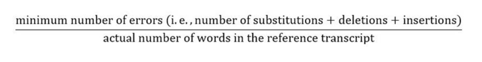

WER is the percentage of transcription errors produced by the ASR method compared to the number of words actually spoken. In other words, it’s the minimum number of words that need to be corrected to change the hypothesis transcript into the reference transcript, divided by the number of words that the speaker originally said. 
According to this formula, we know that the lower the WER, the more accurate the transcribed text is, with 0 error rate the best. WER can go beyond 1 if there are too many insertion errors.

The usage of WER is simple. This algorithm is contained in the jiwer package. First we should install it using the pip function.

For more information regarding the jiwer package, please check https://github.com/jitsi/jiwer

For more detail of WER, please visit https://aws.amazon.com/blogs/machine-learning/evaluating-an-automatic-speech-recognition-service/


Install jiwer package

In [ ]:
!pip install jiwer

Import wer() function that calculates the word error rate from the jiwer package,
also import other packages that are required in doing data analysis

In [ ]:
from jiwer import wer

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read hypothesis text file generated by Amazon Transcribe for different accent

Since this notebook is in the same directory with all the files needed, we read those files directly. All the audio and text files are uploaded in audio-text folder, when you read the file, make sure to add corresponding path to the file name.

In [ ]:
with open('accent text.txt', 'r') as reader:
    test = reader.readlines()

Create a dataframe df that has "Text Type", "Accent", and "Speed" for each hypothesis text as variables

In [ ]:
wer_data = {'Text Type':[1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,
                        1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5],
            'Accent':['French', 'French', 'French', 'French', 'French','Japanese','Japanese','Japanese','Japanese','Japanese','Korean','Korean','Korean','Korean','Korean','Spanish','Spanish','Spanish','Spanish','Spanish','UKS','UKS','UKS','UKS','UKS','USS','USS','USS','USS','USS',
                     'USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS'],
            'Speed':[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                     0.5,0.5,0.5,0.5,0.5,0.8,0.8,0.8,0.8,0.8,1.0,1.0,1.0,1.0,1.0,1.2,1.2,1.2,1.2,1.2,1.5,1.5,1.5,1.5,1.5]}

In [ ]:
df = pd.DataFrame(wer_data)
df.head()

,Text Type,Accent,Speed
0,1,French,1.0
1,2,French,1.0
2,3,French,1.0
3,4,French,1.0
4,5,French,1.0


Keep the first 30 entries of df that are data for different accents, store it in df_accent

In [ ]:
df_accent = df[:30]

Read the five reference texts, save them into five variables

In [ ]:
with open("emoryqss.txt", "r") as reader:
    origin1 = reader.readlines()
with open("emory1.txt", "r") as reader:
    origin2 = reader.readlines()
with open("gatsby.txt", "r") as reader:
    origin3 = reader.readlines()
with open("aws.txt", "r") as reader:
    origin4 = reader.readlines()
with open("biden.txt", "r") as reader:
    origin5 = reader.readlines()

Calculate the WER for each hypothesis text, the result is stored in a list called accent_wer

In [ ]:
origin_ls = [origin1, origin2, origin3, origin4, origin5]

In [ ]:
len_origin = len(origin_ls)

In [ ]:
origin = origin_ls*int((len(df_accent)/len_origin))

The function wer(reference, hyothesis) takes two arguments with reference stands for the original text, and the hypothesis stands for the transcribed text you want to test the accuracy on.

In [ ]:
accent_wer = []

for i in range(len(df_accent)):
    accent_wer.append(wer(origin[i], test[i]))

In [ ]:
print(accent_wer)

[0.6336633663366337, 0.48148148148148145, 0.6666666666666666, 0.4262295081967213, 0.45794392523364486, 0.7425742574257426, 0.8296296296296296, 0.803921568627451, 0.6721311475409836, 0.8037383177570093, 0.801980198019802, 0.725925925925926, 0.8823529411764706, 0.5737704918032787, 0.616822429906542, 0.7326732673267327, 0.4148148148148148, 0.45098039215686275, 0.2786885245901639, 0.42990654205607476, 0.26732673267326734, 0.14814814814814814, 0.2549019607843137, 0.14754098360655737, 0.07476635514018691, 0.3069306930693069, 0.14814814814814814, 0.2549019607843137, 0.06557377049180328, 0.07476635514018691]


Add WER values stored in accent_wer to df_accent as column "wer"

In [ ]:
df_accent['wer'] = accent_wer
print(df_accent)

    Text Type    Accent  Speed       wer
0           1    French    1.0  0.633663
1           2    French    1.0  0.481481
2           3    French    1.0  0.666667
3           4    French    1.0  0.426230
4           5    French    1.0  0.457944
5           1  Japanese    1.0  0.742574
6           2  Japanese    1.0  0.829630
7           3  Japanese    1.0  0.803922
8           4  Japanese    1.0  0.672131
9           5  Japanese    1.0  0.803738
10          1    Korean    1.0  0.801980
11          2    Korean    1.0  0.725926
12          3    Korean    1.0  0.882353
13          4    Korean    1.0  0.573770
14          5    Korean    1.0  0.616822
15          1   Spanish    1.0  0.732673
16          2   Spanish    1.0  0.414815
17          3   Spanish    1.0  0.450980
18          4   Spanish    1.0  0.278689
19          5   Spanish    1.0  0.429907
20          1       UKS    1.0  0.267327
21          2       UKS    1.0  0.148148
22          3       UKS    1.0  0.254902
23          4   

<ipython-input-100-b1b89866beed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accent['wer'] = accent_wer


Visualize the WER for different accent (colors are for accents)

In [ ]:
color1 = ["red"]*len_origin+["yellow"]*len_origin+["blue"]*len_origin+["purple"]*len_origin+["orange"]*len_origin+["black"]*len_origin

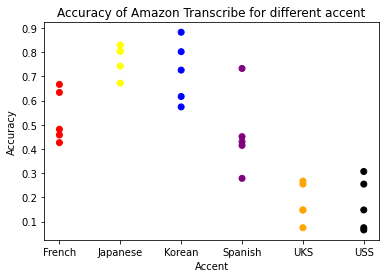

In [ ]:
plt.scatter(df_accent['Accent'], df_accent['wer'], c=color1)

plt.xlabel('Accent')
plt.ylabel('Accuracy')
plt.title('Accuracy of Amazon Transcribe for different accent')
plt.show()

<font size="3"> WER for different speed </font>

Read the hypothesis text files

In [ ]:
with open('speed text.txt', 'r') as reader:
    test = reader.readlines()

Choose last 25 entries of df that contains data for different speed of speech, store it in df_speed

In [ ]:
df_speed = df[30:]

Calculate WER, store the result into list speed_wer

In [ ]:
origin = origin_ls*int(len(df_speed)/len_origin)

In [ ]:
speed_wer = []
for i in range(len(df_speed)):
    speed_wer.append(wer(origin[i], test[i]))

Add WER values stored in speed_wer to df_speed as column "wer"

In [1]:
df_speed['wer'] = speed_wer
df_speed

NameError: name 'speed_wer' is not defined

Visualize WER for different speed of speach

In [ ]:
color1 = ["red"]*len_origin+["yellow"]*len_origin+["blue"]*len_origin+["purple"]*len_origin+["orange"]*len_origin

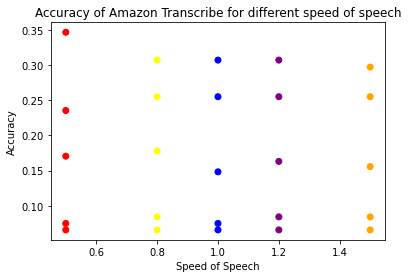

In [ ]:
plt.scatter(df_speed['Speed'], df_speed['wer'], c=color1)

plt.xlabel('Speed of Speech')
plt.ylabel('Accuracy')
plt.title('Accuracy of Amazon Transcribe for different speed of speech')
plt.show()

Combine df_accent and df_speed to get the full version of WER data me_wer_df

In [ ]:
my_wer_df = df_accent.append(df_speed)
my_wer_df

,Text Type,Accent,Speed,wer
0,1,French,1.0,0.633663
1,2,French,1.0,0.481481
2,3,French,1.0,0.666667
3,4,French,1.0,0.426230
4,5,French,1.0,0.457944
5,1,Japanese,1.0,0.742574
6,2,Japanese,1.0,0.829630
7,3,Japanese,1.0,0.803922
8,4,Japanese,1.0,0.672131
9,5,Japanese,1.0,0.803738


## Result And Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Read data we calculated from csv and seperate the whole dataset into "acc" which contains five different accents with six different text types and "spd" which contains five different speeds with five different text types

In [ ]:
df = pd.read_csv ('all_wer.csv')
print (df)
acc = df[0:30]
spd = df[30:]

    Unnamed: 0  Text Type    Accent  Speed       wer
0            0          1    French    1.0  0.633663
1            1          2    French    1.0  0.481481
2            2          3    French    1.0  0.666667
3            3          4    French    1.0  0.426230
4            4          5    French    1.0  0.457944
5            5          1  Japanese    1.0  0.742574
6            6          2  Japanese    1.0  0.829630
7            7          3  Japanese    1.0  0.803922
8            8          4  Japanese    1.0  0.672131
9            9          5  Japanese    1.0  0.803738
10          10          1    Korean    1.0  0.801980
11          11          2    Korean    1.0  0.725926
12          12          3    Korean    1.0  0.882353
13          13          4    Korean    1.0  0.573770
14          14          5    Korean    1.0  0.616822
15          15          1   Spanish    1.0  0.732673
16          16          2   Spanish    1.0  0.414815
17          17          3   Spanish    1.0  0.

create two boxplots to visualize the word error rate (wer) for different accent and speed

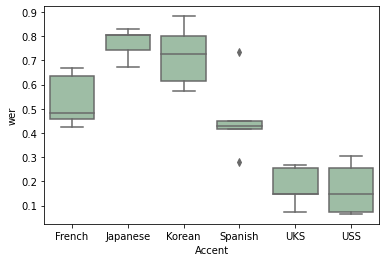

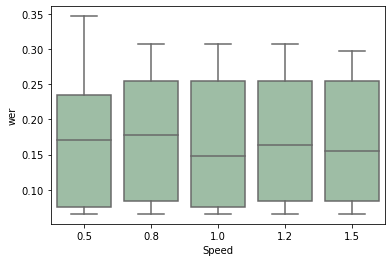

In [ ]:
ax = sns.boxplot(x='Accent', y='wer', data=acc, color='#99c2a2')
plt.show()
ax = sns.boxplot(x='Speed', y='wer', data=spd, color='#99c2a2')
plt.show()

*Findings*

From the boxplot visualizing the word error rate (WER) for different accents, we can find Japanese and US are the accents with highest WER and lowest average WER respectively. It means that the Transcribe model can recognize United States style English with most accuracy and Japanese style English with lowest accuracy. Besides, the variance of WER for Spanish accent is the largest, which means that the accuracy of Transcribe model to convert Spanish accents often varies a lot.

From the boxplot visualizing the word error rate (WER) for different speeds, we can find speed of 0.8 and 1.0 are the speeds with highest WER and lowest average WER. It means that the Transcribe model can recognize English at speed 1.0 with highest accuracy and at speed 0.8 at lowest accuracy. However, what’s different from our results for accents above is that the average WER for different speeds are relatively close and all around 0.15.

We choose to conduct t-test for the Japanese and USS which are the accent with highest wer and lowest average wer respectively. The aim of t-test is to justify whether the difference of wer of Japanese and USS are significant

In [ ]:
from scipy.stats import ttest_ind

JPN = acc[acc['Accent']=='Japanese']
USS = acc[acc['Accent']=='USS']

ttest_ind(JPN['wer'], USS['wer'])

Ttest_indResult(statistic=10.731867150782465, pvalue=4.997618110068202e-06)

We next conduct t-test for the speed 0.8 and 1.0 which are the speed with highest wer and lowest average wer respectively. The aim of t-test is to justify whether the difference of wer of 0.8 and 1.0 are significant

In [ ]:
lowspd = spd[spd['Speed']==0.8]
highspd = spd[spd['Speed']==1.0]

ttest_ind(lowspd['wer'], highspd['wer'])

Ttest_indResult(statistic=0.11594380607969237, pvalue=0.9105546824313931)

*Findings*

The result of t-test for Japanese and USS shows that p-value, 4.99e-06 is smaller than any significance level and we have sufficient evidence to reject the null hypothesis that Japanese and USS have the same mean value of WER. In other words, we can state that the difference between the mean WER value of Japanese and USS are significantly large.
The result of t-test for speed 0.8 and speed 1.0 shows that p-value, 0.9106  is greater than the significance level at 5% and we do not have sufficient evidence to reject the null hypothesis that speed 0.8 and speed 1.0 have the same mean value of WER. In other words, we can state that the mean WER value of speed 0.8 and speed 1.0 don’t have significant differences.


Then, we conduct the Ordinary Least Squares model for wer ~ C(Speed)+C(Accent) where word error rate is the dependent variable, speed and accent are two categorical independent variables. Moreover, we create ANOVA table.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# Ordinary Least Squares (OLS) model
model = ols('wer ~ C(Speed)+C(Accent)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Speed),0.000367,4.0,0.007592,9.998809e-01
C(Accent),2.050341,5.0,33.954670,3.324150e-14
Residual,0.543462,45.0,NaN,NaN


*Findings*

From the ANOVA table above, we can find that the sum of squares of speed is obviously smaller than the sum of squares of accent. That is to say that total variance in accent variables are larger than total variance in speed variables. Also since variable speed has a large p value at 0.998, which is larger than significance level and we can conclude that the differences between the means are not statistically significant. We observe that the p-value of accent is 3.32e-14 which is smaller than any significance level. Thus, we can state that the differences between the means are statistically significant and there are some differences in mean values of accents.

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wer   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     26.39
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           4.07e-15
Time:                        02:11:30   Log-Likelihood:                 48.929
No. Observations:                  55   AIC:                            -77.86
Df Residuals:                      45   BIC:                            -57.79
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.5416      0.078      6.970      0.000       0.385       0.698
C(Speed)[T.0.8]          -0.0006      0.070     -0.009      0.993      -0.141       0.139
C(Speed)[T.1.0]          -0.0084      0.060     -0.140      0.889      -0.130       0.113
C(Speed)[T.1.2]          -0.0036      0.070     -0.052      0.959      -0.144       0.136
C(Speed)[T.1.5]          -0.0071      0.070     -0.102      0.919      -0.147       0.133
C(Accent)[T.Japanese]     0.2372      0.070      3.413      0.001       0.097       0.377
C(Accent)[T.Korean]       0.1870      0.070      2.690      0.010       0.047       0.327
C(Accent)[T.Spanish]     -0.0718      0.070     -1.033      0.307      -0.212       0.068
C(Accent)[T.UKS]         -0.3547      0.070     -5.103      0.000      -0.495      -0.215
C(Accent)[T.USS]         -0.3631      0.060     -6.033      0.000      -0.484      -0.242
==============================================================================
Omnibus:                        2.872   Durbin-Watson:                   2.532
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                2.437
Skew:                           0.402   Prob(JB):                        0.296
Kurtosis:                       2.353   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Findings*

From the regression summary above, we can find that F statistics is large and p-value for F test (4.07e-15) is smaller than any significance level. The results provide sufficient evidence to reject the null hypothesis and can conclude that the independent variables are not purely random with respect to the dependent variable and this regression model does have some validity in fitting the data. The coefficients of all categorical variables “speed” are all negative. For example, speed 0.8 has a -0.0006 coefficient, which implies that the WER of speed 0.8 is predicted to be -0.0006 lower than other speed that is not 0.8, holding other variables the same. As for the categorical variable “Accent”, the coefficients of Japanese and Korean are positive, which means that WER of Japanese and Korean will be larger than other accents, holding other variables are same. In contrast, the coefficients of Spanish, UK English, and US English are negative, which means that WER of Spanish, UK English, and US English are predicted to be lower than other accents, holding other variables are same.


By fixing accent type which is only United State type, we run the regression for dependent word error rate and numerical independent variable speed. We hope to find how speed can influence the word error rate as speed increases.

In [ ]:
model2 = ols('wer ~ Speed', data=spd).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)

anova_table2

,sum_sq,df,F,PR(>F)
Speed,0.000147,1.0,0.014599,0.904879
Residual,0.231572,23.0,NaN,NaN


*Findings*

From the ANOVA table above, we can find that the sum of squares of speed is extremely small, which means that total variance in speed variables is small enough. Also since variable speed has a large p value at 0.905, which is larger than significance level and we can conclude that the differences between the means are not statistically significant. 


In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wer   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                   0.01460
Date:                Fri, 23 Apr 2021   Prob (F-statistic):              0.905
Time:                        02:11:34   Log-Likelihood:                 23.048
No. Observations:                  25   AIC:                            -42.10
Df Residuals:                      23   BIC:                            -39.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1817      0.062      2.919      0.008       0.053       0.310
Speed         -0.0071      0.059     -0.121      0.905      -0.129       0.115
==============================================================================
Omnibus:                       11.023   Durbin-Watson:                   2.301
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                2.498
Skew:                           0.239   Prob(JB):                        0.287
Kurtosis:                       1.527   Cond. No.                         6.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Findings*

From the regression summary table, we can find that F statistics is small and p-value for F test (0.905) is larger than any significance level. We do not have sufficient evidence to reject the null hypothesis that all regression coefficients are zero. Thus, we conclude that the independent variables are purely random with respect to the dependent variable and this regression model does not have enough validity in fitting the data. Since we treat speed as numerical variable at this model, the coefficient of speed is -0.007, which implies that by holding other variables constant, the one more unit in speed will decrease the WER by 0.0071. 

## Conclusion 


According to our OLS Regression and data visualization, accents and speed do affect the accuracy of Amazon Transcribe. Amazon Transcribe results in accuracies for different accents which rank from the highest to lowest as US, UK, Spanish, French, Korean, and Japanese. Meanwhile, based on the regression, the positive coefficient of scripts generated from Japanese and Korean accents and WER suggest the error rate for these two accents tends to be higher compared to other accents, whereas the negative coefficient of scripts generated from UK, Spanish, and US accents and WER suggests a more accurate transcription.


As for the speed, the WER values of different speeds do not show a significant difference given a large p-value. From boxplot visualization, we can find that the average value of WER in the five different speeds falls in the range around 0.15. We also find that the difference between speed 0.8 which has the largest WER and speed 1.0 which has lowest WER are not significant, which corresponds to our main finding. Based on regression model analysis, the coefficients are all negative for the categorical speeds. If treating speed as a numerical variable, for every unit increase in speed, the WER value will decrease.


## Reference


http://www.agocg.ac.uk/brief/audio.htm

https://voicegenerator.io/

https://trint.com/resources/7mkq7m80/what-is-audio-transcription-and-what-industries-need-it-the-most

https://aws.amazon.com/transcribe/

https://github.com/jitsi/jiwer
